<a href="https://colab.research.google.com/github/jsotoacebal/Analisis_predictivo/blob/main/Studentgrade_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar

In [149]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [150]:
import pandas as pd
#Cargar datos
df = pd.read_csv('student-mat.csv')


##Exploración

In [151]:
print('Cantidad de Filas y columnas:', df.shape)

Cantidad de Filas y columnas: (395, 33)


In [152]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [153]:
#Cantidad de datos duplicados
df.duplicated().sum()

0

In [154]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [155]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [156]:
df_num = df.select_dtypes(include=['int', 'float'])
df_obj = df.select_dtypes(include=['object'])
print(df_obj.head())

  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F       U     GT3       A  at_home   teacher  course   mother   
1     GP   F       U     GT3       T  at_home     other  course   father   
2     GP   F       U     LE3       T  at_home     other   other   mother   
3     GP   F       U     GT3       T   health  services    home   mother   
4     GP   F       U     GT3       T    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic  
0       yes     no   no         no     yes    yes       no       no  
1        no    yes   no         no      no    yes      yes       no  
2       yes     no  yes         no     yes    yes      yes       no  
3        no    yes  yes        yes     yes    yes      yes      yes  
4        no    yes  yes         no     yes    yes       no       no  


In [157]:
print(df_num.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10  


In [158]:
#Columnas con missing
columns_with_missing = df.columns[df.isnull().any()]

missing_value_counts = df[columns_with_missing].isnull().sum()

sorted_columns_desc = missing_value_counts.sort_values(ascending=False)

print("Columns with missing values (sorted in descending order):")
print(sorted_columns_desc)

Columns with missing values (sorted in descending order):
Series([], dtype: float64)


In [159]:
missing_counts = df.isnull().sum()
print(missing_counts)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


###Graficos

<Axes: xlabel='G3'>

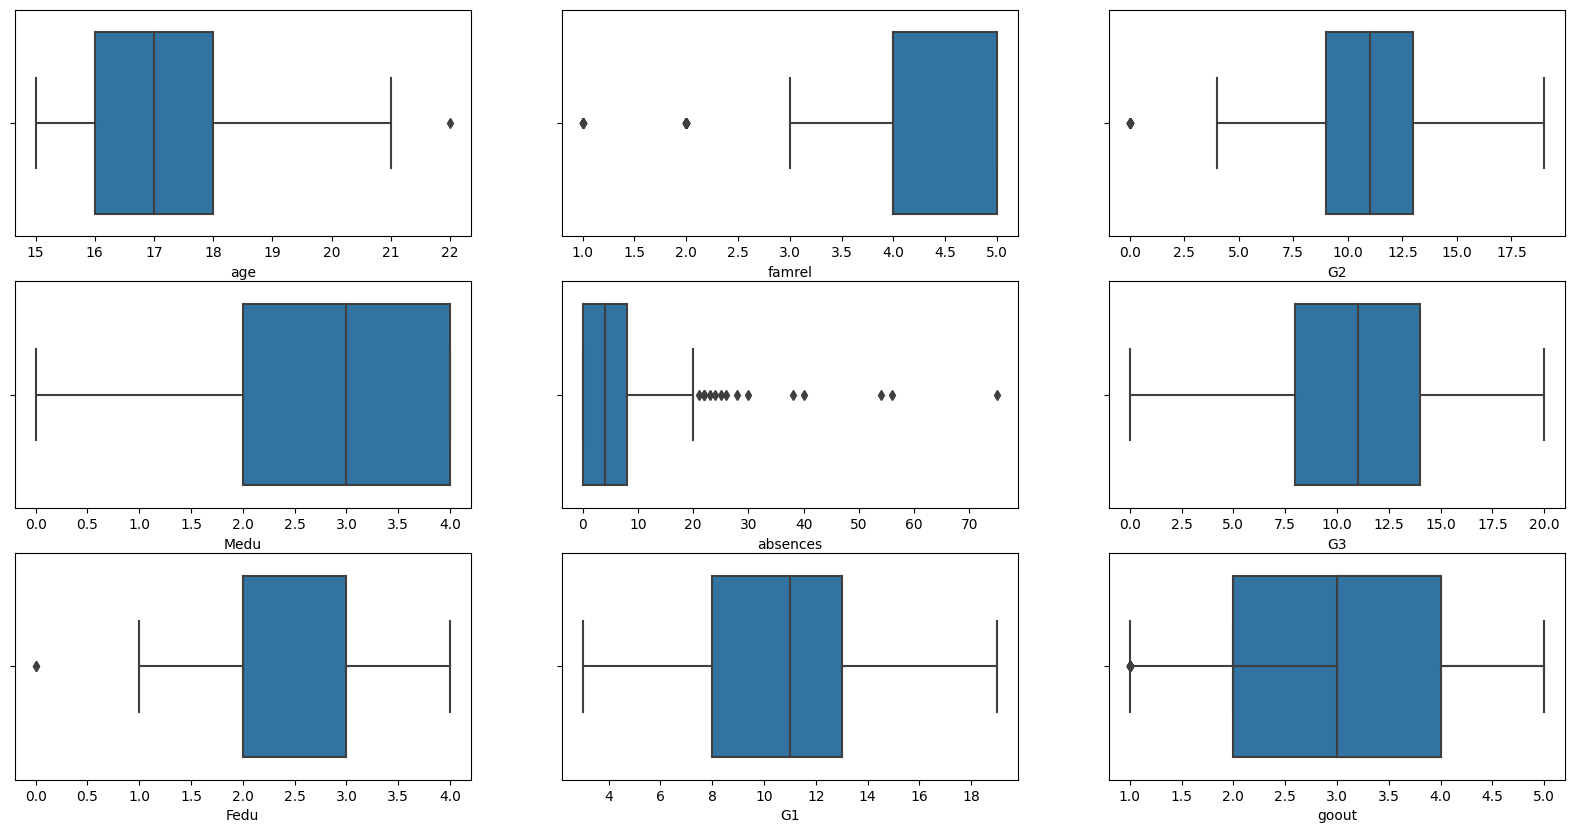

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,3, figsize=(20, 10))

sns.boxplot(x=df["age"],ax=axs[0,0])
sns.boxplot(x=df["Medu"],ax=axs[1,0],orient='h')
sns.boxplot(x=df["Fedu"],ax=axs[2,0],orient='h')
sns.boxplot(x=df["famrel"],ax=axs[0,1])
sns.boxplot(x=df["freetime"],ax=axs[2,2])
sns.boxplot(x=df["goout"],ax=axs[2,2])
sns.boxplot(x=df["absences"],ax=axs[1,1])
sns.boxplot(x=df["G1"],ax=axs[2,1])
sns.boxplot(x=df["G2"],ax=axs[0,2])
sns.boxplot(x=df["G3"],ax=axs[1,2])

<ipython-input-161-64944a13f826>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


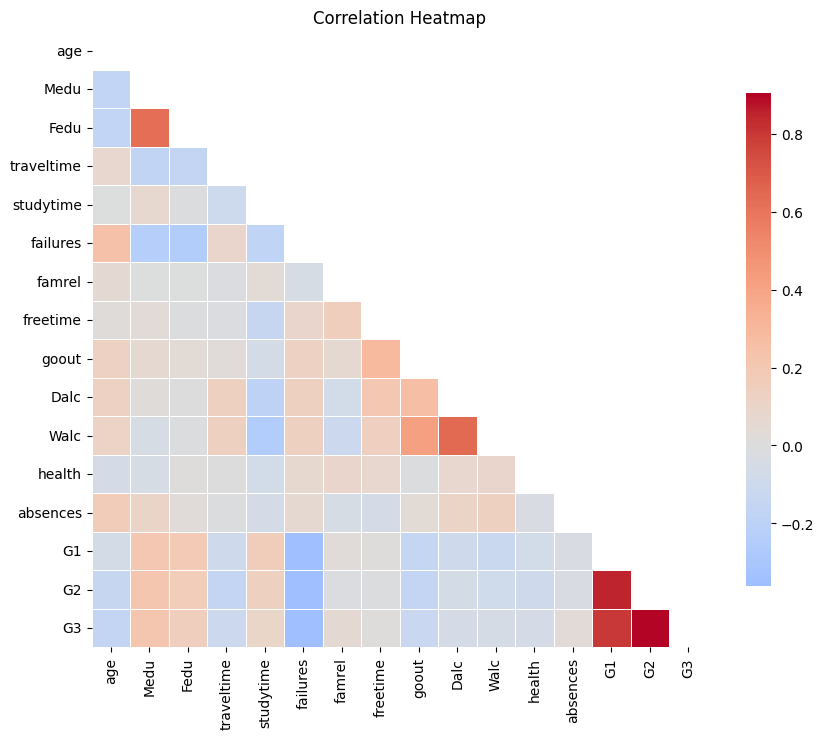

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=False, center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')

plt.show()


<ipython-input-162-bcb5d75862bf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df.G3,kde_kws=dict(bw=0.2))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


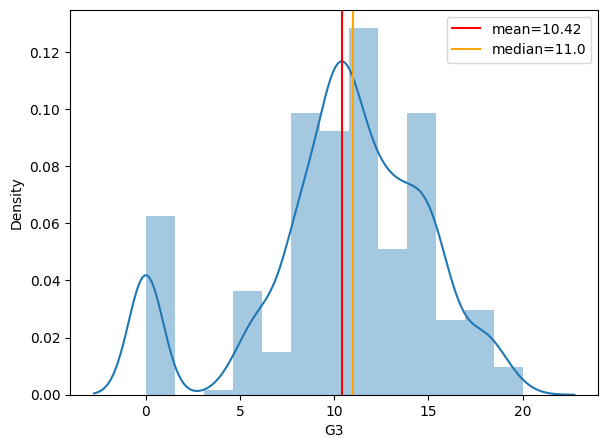

In [162]:
ratings = dict(mean=df.G3.mean(),
              median=df.G3.median())

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(df.G3,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c="red",label=f"mean={round(ratings['mean'],2)}")
ax1.axvline(x=ratings["median"],c="orange",label=f"median={round(ratings['median'],2)}")
plt.legend()

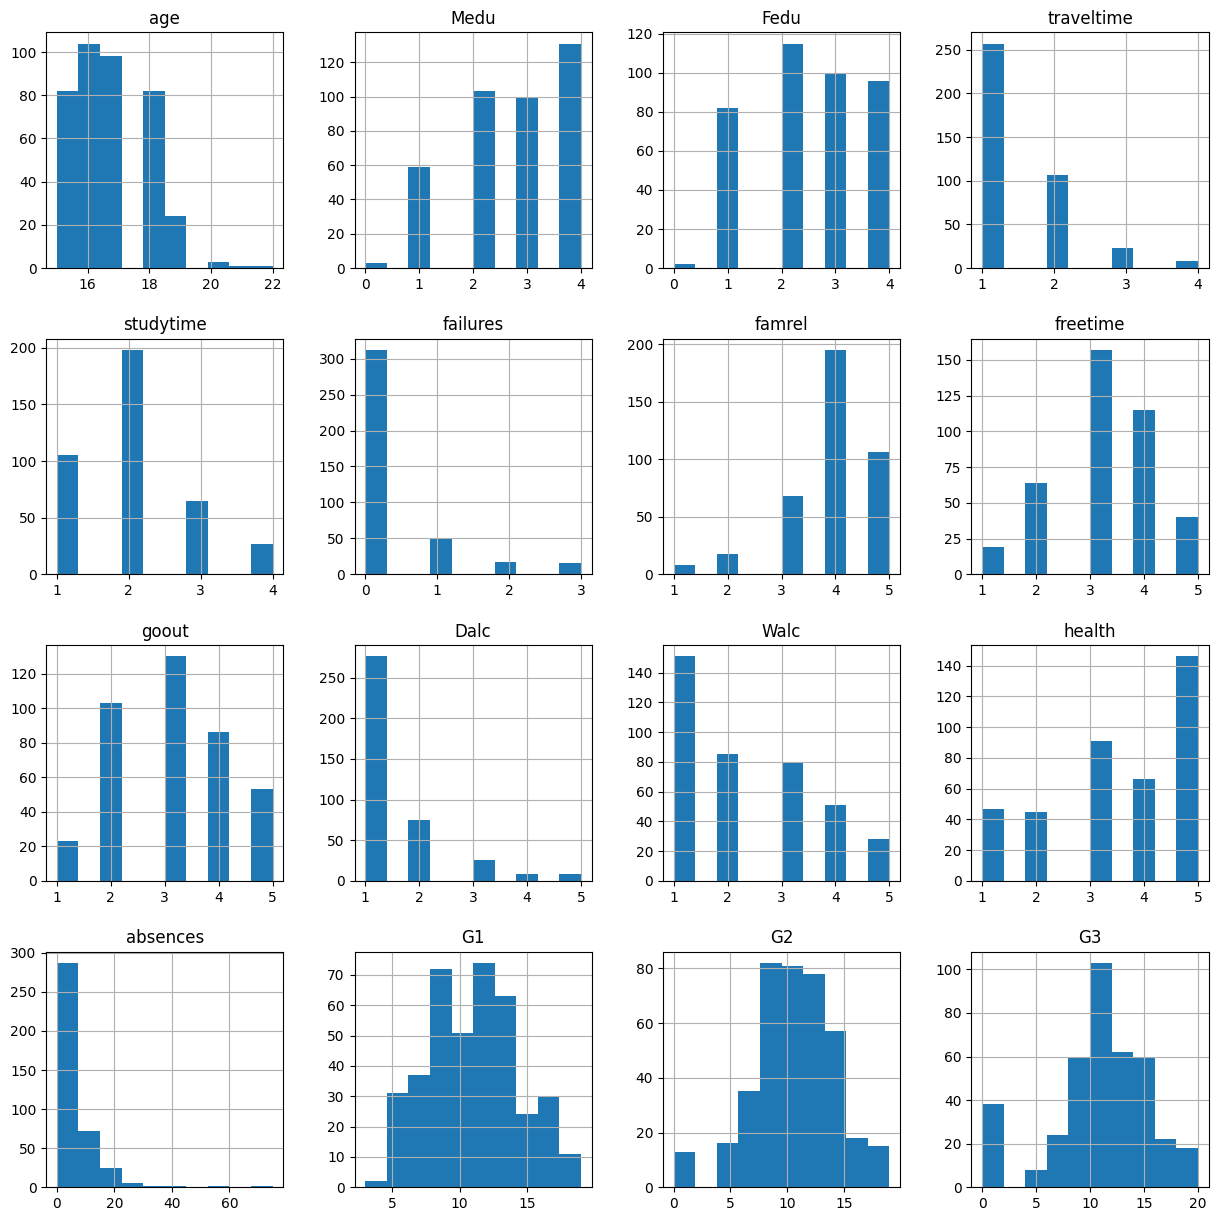

In [163]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,15))
plt.show()

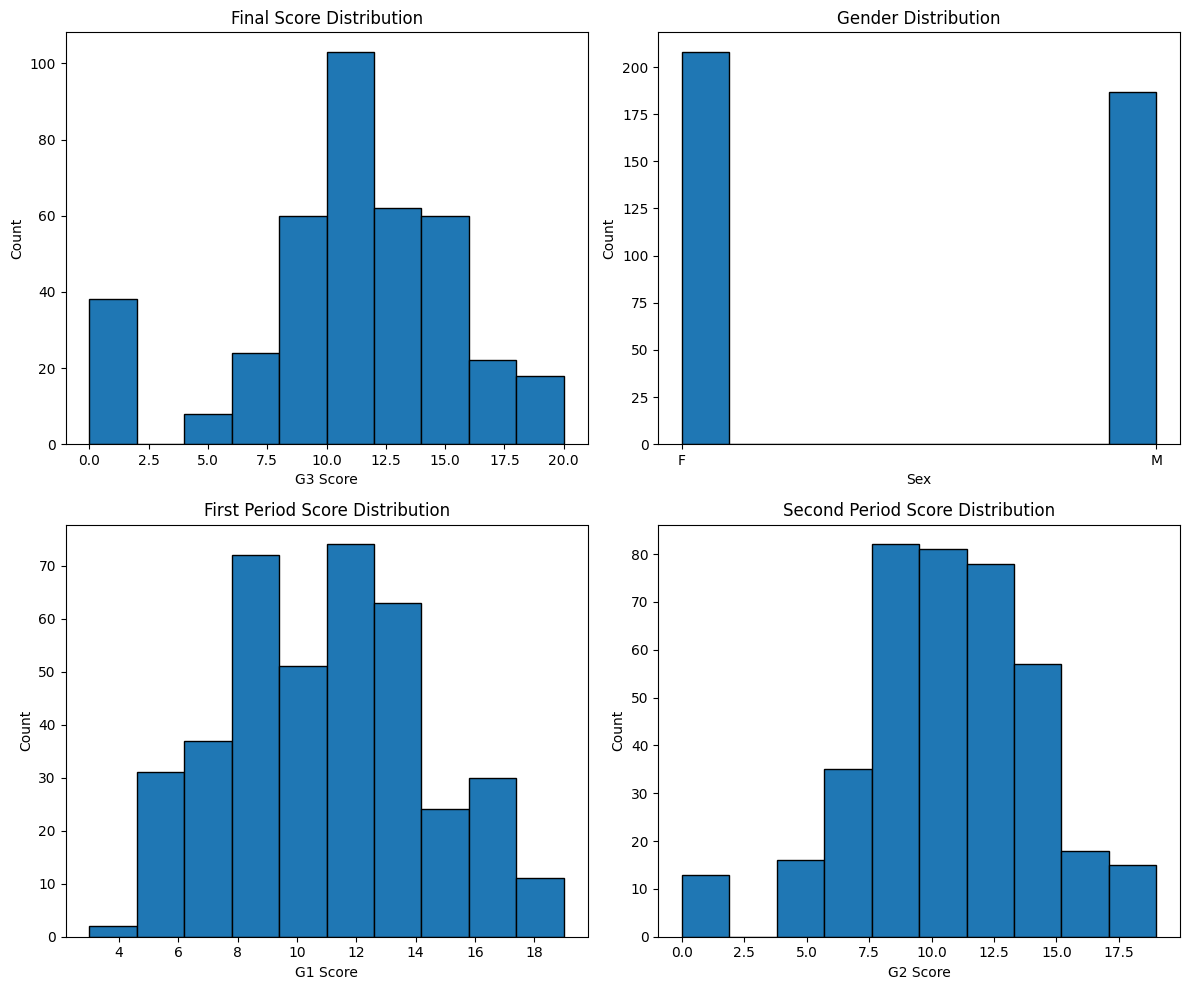

In [164]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(df['G3'], edgecolor='black')
axs[0, 0].set_title('Final Score Distribution')
axs[0, 0].set_xlabel('G3 Score')
axs[0, 0].set_ylabel('Count')

axs[0, 1].hist(df['sex'], edgecolor='black')
axs[0, 1].set_title('Gender Distribution')
axs[0, 1].set_xlabel('Sex')
axs[0, 1].set_ylabel('Count')

axs[1, 0].hist(df['G1'], edgecolor='black')
axs[1, 0].set_title('First Period Score Distribution')
axs[1, 0].set_xlabel('G1 Score')
axs[1, 0].set_ylabel('Count')

axs[1, 1].hist(df['G2'], edgecolor='black')
axs[1, 1].set_title('Second Period Score Distribution')
axs[1, 1].set_xlabel('G2 Score')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()

plt.show()

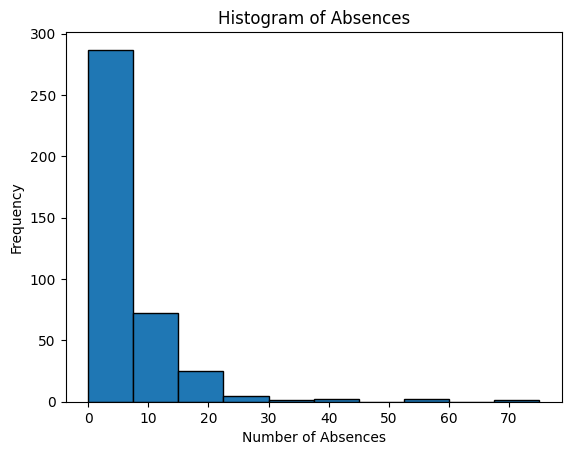

In [165]:
import matplotlib.pyplot as plt

plt.hist(df['absences'], bins=10, edgecolor='black')
plt.xlabel('Number of Absences')
plt.ylabel('Frequency')
plt.title('Histogram of Absences')
plt.show()


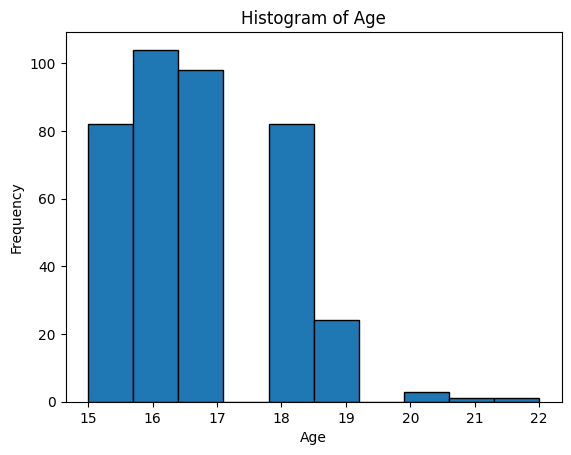

In [166]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


<ipython-input-167-8c345e1f5271>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  b = sns.kdeplot(df['age'], shade=True)


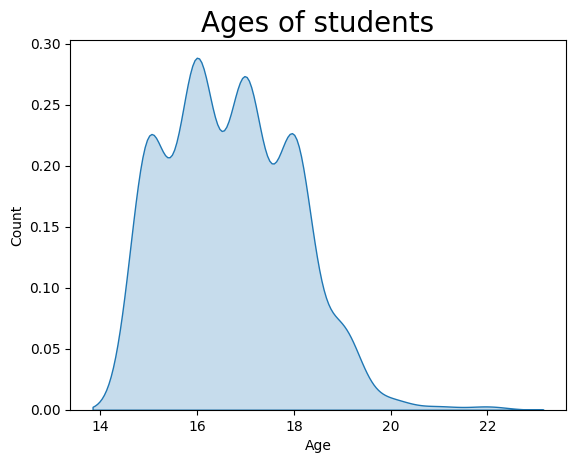

In [167]:
b = sns.kdeplot(df['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 20)
b.set_xlabel('Age', fontsize = 10)
b.set_ylabel('Count', fontsize = 10)
plt.show()

In [168]:
import numpy as np

column_values = df["G3"].values

any_value_exceeds_20 = np.any(column_values > 20)

any_missing_values = np.any(np.isnan(column_values))

print("Any value exceeds 20:", any_value_exceeds_20)
print("Any missing values:", any_missing_values)


Any value exceeds 20: False
Any missing values: False


##Transformación

In [169]:
unique_addresses = df["school"].unique()
print(unique_addresses)

['GP' 'MS']


In [170]:
unique_addresses = df["address"].unique()
print(unique_addresses)

['U' 'R']


In [171]:
unique_addresses = df["famsize"].unique()
print(unique_addresses)

['GT3' 'LE3']


In [172]:
unique_addresses = df["Pstatus"].unique()
print(unique_addresses)

['A' 'T']


In [173]:
from sklearn.preprocessing import LabelEncoder

#Variables
variables_to_encode = ["sex", "address", "famsize", "Pstatus","school","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]

encoder = LabelEncoder()

for variable in variables_to_encode:
    encoded_values = encoder.fit_transform(df[variable])
    df[f"{variable}_e"] = encoded_values

In [174]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          395 non-null    object
 9   Fjob          395 non-null    object
 10  reason        395 non-null    object
 11  guardian      395 non-null    object
 12  traveltime    395 non-null    int64 
 13  studytime     395 non-null    int64 
 14  failures      395 non-null    int64 
 15  schoolsup     395 non-null    object
 16  famsup        395 non-null    object
 17  paid          395 non-null    object
 18  activities    395 non-null    object
 19  nursery 

In [175]:
df_num = df.select_dtypes(include=['int', 'float'])
print(df_num.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  reason_e  guardian_e  schoolsup_e  famsup_e  paid_e  \
0     1  ...         0           1            1         0       0   
1     1  ...         0           0            0         1       0   
2     2  ...         2           1            1         0       1   
3     1  ...         1           1            0         1       1   
4     1  ...         1           0            0         1       1   

   activities_e  nursery_e  higher_e  internet_e  romantic_e  
0             0          1         1     

In [176]:
unique_addresses = df["G3"].unique()
print(unique_addresses)

[ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


In [177]:
count_zero_G3 = (df['G3'] == 0).sum()
print("Number of occurrences where G3 is equal to 0:", count_zero_G3)

Number of occurrences where G3 is equal to 0: 38


In [178]:
#Cuartiles
quartiles_G3 = df['G3'].quantile([0.25, 0.5, 0.75])

print("Quartiles of G3:")
print("25th percentile:", quartiles_G3[0.25])
print("50th percentile (median):", quartiles_G3[0.5])
print("75th percentile:", quartiles_G3[0.75])


Quartiles of G3:
25th percentile: 8.0
50th percentile (median): 11.0
75th percentile: 14.0


In [179]:
#Cuartiles
quartiles_G3 = df['absences'].quantile([0.25, 0.5, 0.75,0.95])

print("Quartiles of absences:")
print("25th percentile:", quartiles_G3[0.25])
print("50th percentile (median):", quartiles_G3[0.5])
print("75th percentile:", quartiles_G3[0.75])
print("95th percentile:", quartiles_G3[0.95])



Quartiles of absences:
25th percentile: 0.0
50th percentile (median): 4.0
75th percentile: 8.0
95th percentile: 18.299999999999955


In [180]:
#G3 = 0 y promedio G1 y G2 es mayor al primer cuartil
filtered_df = df[(df['G1'] + df['G2']) / 2 > 8]
count_zero_G3_filtered = (filtered_df['G3'] == 0).sum()

print("Number of occurrences where G3 is equal to 0 and G1+G2/2 > 8:", count_zero_G3_filtered)

Number of occurrences where G3 is equal to 0 and G1+G2/2 > 8: 7


In [181]:
import numpy as np

df.loc[df['absences'] > 50, 'absences'] = 18

avg_G1_G3 = (df['G1'] + df['G3']) / 2
df.loc[(df['G3'] == 0) & (df['G1'] != 0) & (df['G2'] != 0), 'G3'] = avg_G1_G3


In [182]:
df_zero_G3 = df[df['G3'] == 0]

G1_values = df_zero_G3['G1']
G2_values = df_zero_G3['G2']

print("G1 values when G3 is 0:")
print(G1_values)
print()

print("G2 values when G3 is 0:")
print(G2_values)


G1 values when G3 is 0:
130    12
131     8
134     9
135    11
136    10
137     4
144     5
153     5
162     7
242     6
244     7
269     6
332     7
Name: G1, dtype: int64

G2 values when G3 is 0:
130    0
131    0
134    0
135    0
136    0
137    0
144    0
153    0
162    0
242    0
244    0
269    0
332    0
Name: G2, dtype: int64


##Visualizaciones

Text(0.5, 0, ' number of past class failures')

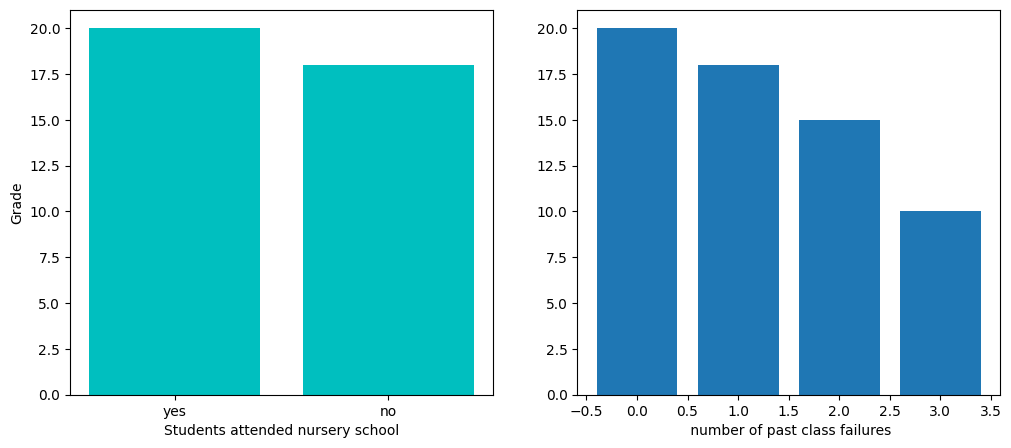

In [183]:
#Nuersery vs failures
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(df['nursery'],df['G3'],color='c')
ax1.set_xlabel('Students attended nursery school')
ax1.set_ylabel('Grade')
ax2.bar(df['failures'],df['G3'])
ax2.set_xlabel(' number of past class failures')

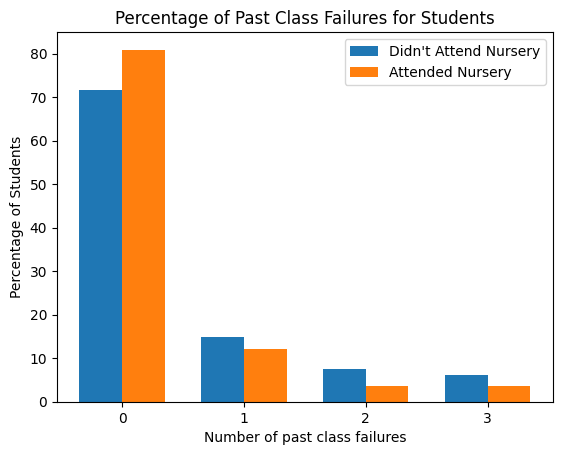

In [184]:
#Nuersery vs failures

#No nursery
df_no_nursery = df[df['nursery'] == 'no']
total_no_nursery = len(df_no_nursery)
failures_no_nursery = df_no_nursery['failures'].value_counts() / total_no_nursery * 100

#Si nursery
df_nursery = df[df['nursery'] == 'yes']
total_nursery = len(df_nursery)
failures_nursery = df_nursery['failures'].value_counts() / total_nursery * 100

unique_failures = sorted(set(failures_no_nursery.index).union(failures_nursery.index))

fig, ax = plt.subplots()

width = 0.35

#Barras no nursery
ax.bar([x - width/2 for x in unique_failures], failures_no_nursery.loc[unique_failures], width, label="Didn't Attend Nursery")

#Barras si nursery
ax.bar([x + width/2 for x in unique_failures], failures_nursery.loc[unique_failures], width, label="Attended Nursery")

ax.set_xticks(unique_failures)
ax.set_xticklabels(unique_failures)

ax.set_xlabel('Number of past class failures')
ax.set_ylabel('Percentage of Students')
ax.set_title('Percentage of Past Class Failures for Students')

ax.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


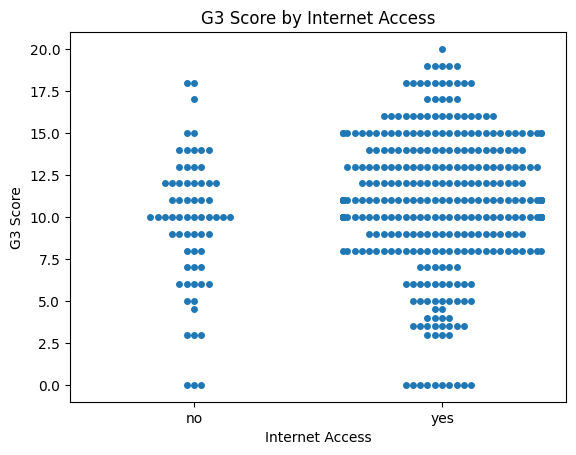

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.swarmplot(x='internet', y='G3', data=df)

plt.xlabel('Internet Access')
plt.ylabel('G3 Score')

plt.title('G3 Score by Internet Access')

plt.show()

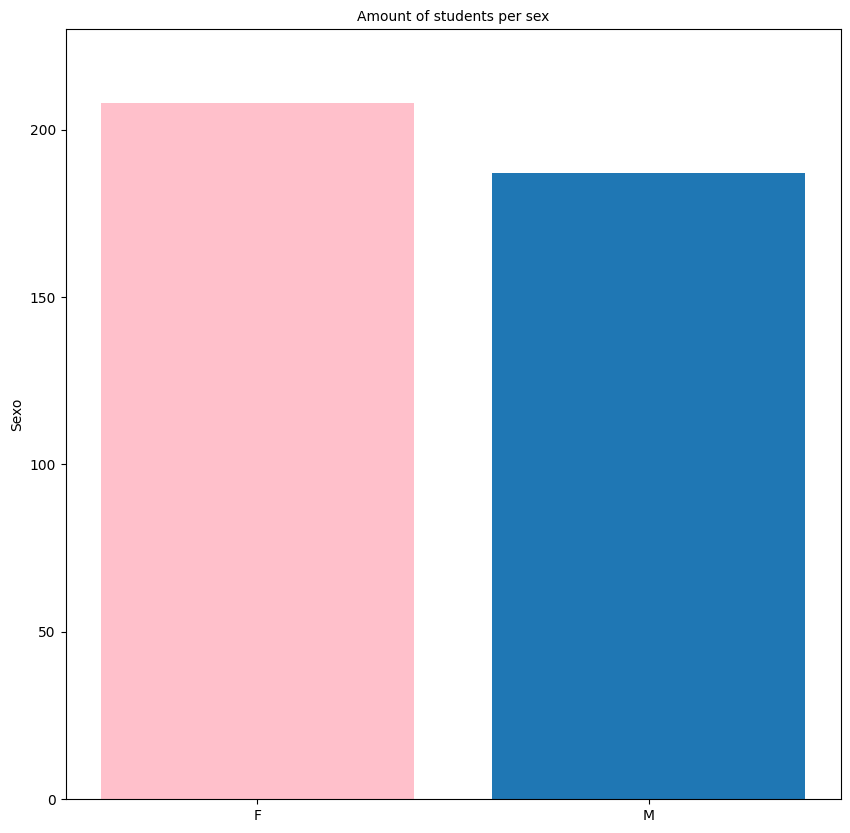

In [186]:
plt.figure(figsize= (10, 10))
bars = plt.bar(df['sex'].value_counts().keys(), df['sex'].value_counts().values, color= ['pink', '#1f77b4'])

plt.ylim([0, 230])
plt.title('Amount of students per sex', fontsize= 10)
plt.ylabel('Sexo')
plt.show()

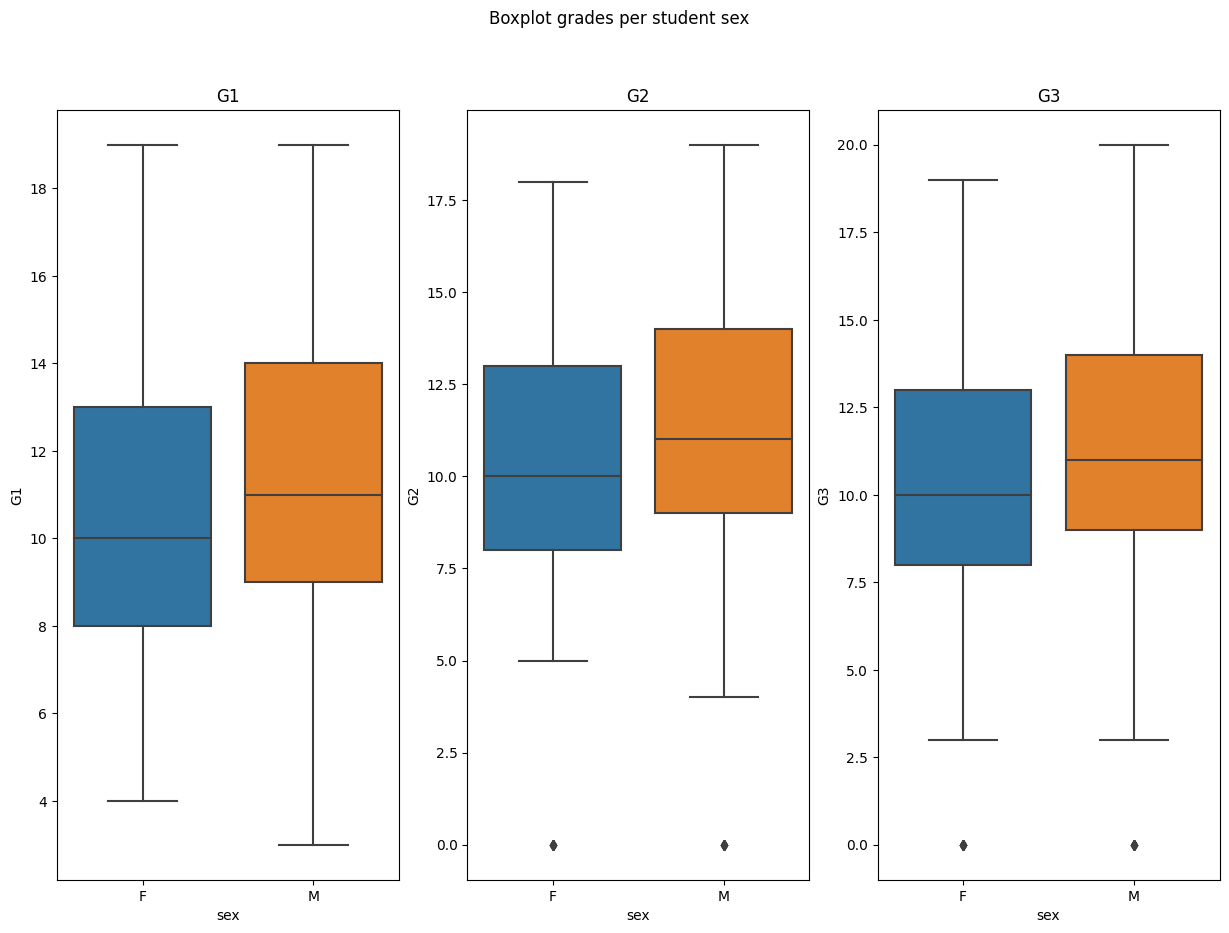

In [187]:
fig, axes = plt.subplots(1, 3, figsize= (15, 10))
plt.suptitle('Boxplot grades per student sex')
ax1 = sns.boxplot(data= df, x= 'sex', y= 'G1', ax= axes[0])
ax1.set_title('G1')
ax2 = sns.boxplot(data= df, x= 'sex', y= 'G2', ax= axes[1])
ax2.set_title('G2')
ax3 = sns.boxplot(data= df, x= 'sex', y= 'G3', ax= axes[2])
ax3.set_title('G3')
plt.show()

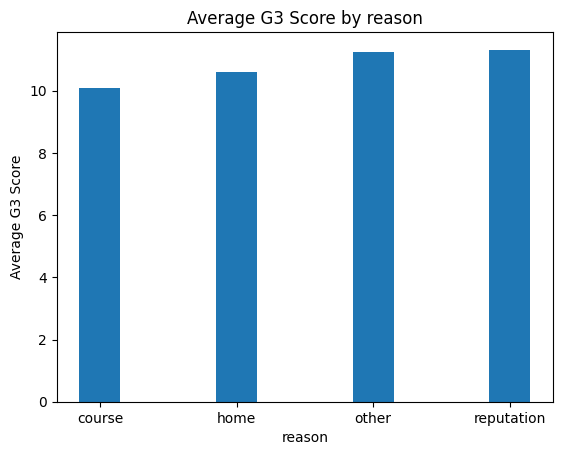

In [188]:
#G3 vs sexo
import matplotlib.pyplot as plt

average_scores = df.groupby('reason')['G3'].mean()

plt.bar(average_scores.index, average_scores, width=0.3)

plt.xlabel('reason')
plt.ylabel('Average G3 Score')
plt.title('Average G3 Score by reason')

plt.subplots_adjust(wspace=0.5)

plt.show()

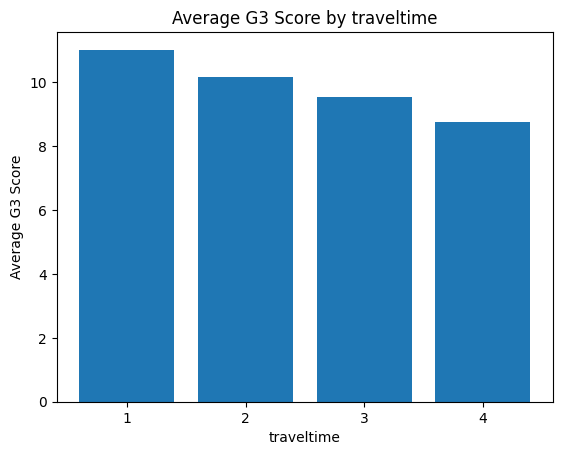

In [189]:
#G3 vs traveltime
import matplotlib.pyplot as plt

average_scores = df.groupby('traveltime')['G3'].mean()

plt.bar(average_scores.index, average_scores)

plt.xticks(average_scores.index)

plt.xlabel('traveltime')
plt.ylabel('Average G3 Score')
plt.title('Average G3 Score by traveltime')

plt.show()


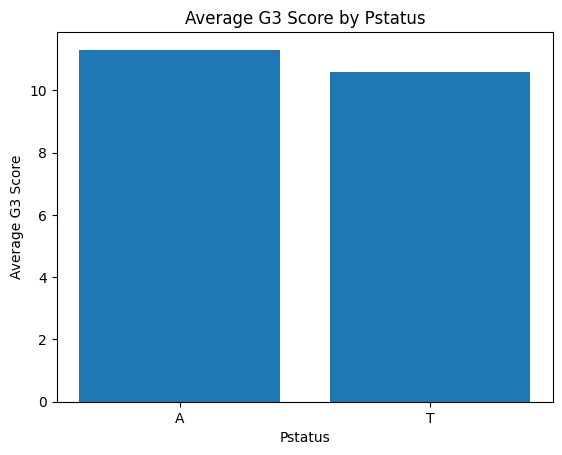

In [190]:
#Avg G3 vs Pstatus
import matplotlib.pyplot as plt

average_scores = df.groupby('Pstatus')['G3'].mean()

plt.bar(average_scores.index, average_scores)

plt.xticks(average_scores.index)

plt.xlabel('Pstatus')
plt.ylabel('Average G3 Score')
plt.title('Average G3 Score by Pstatus')

plt.show()

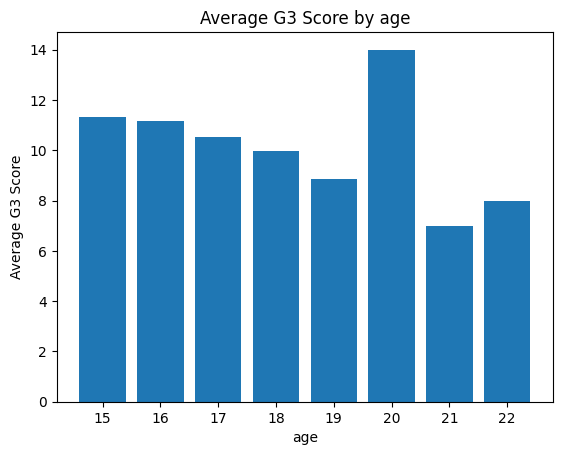

In [191]:
#Avg G3 vs Pstatus
import matplotlib.pyplot as plt

average_scores = df.groupby('age')['G3'].mean()

plt.bar(average_scores.index, average_scores)

plt.xticks(average_scores.index)

plt.xlabel('age')
plt.ylabel('Average G3 Score')
plt.title('Average G3 Score by age')

plt.show()

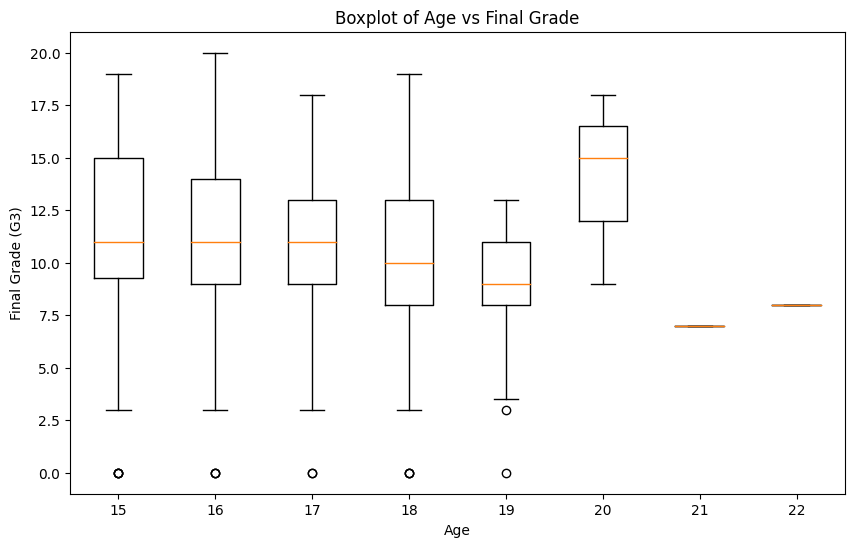

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['age'] == age]['G3'] for age in sorted(df['age'].unique())])
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.title('Boxplot of Age vs Final Grade')
plt.xticks(range(1, len(df['age'].unique()) + 1), sorted(df['age'].unique()))
plt.show()


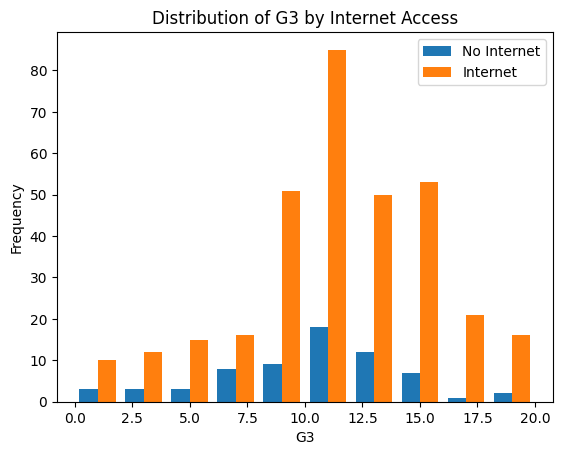

In [193]:
#G3 vs Internet access total
import matplotlib.pyplot as plt

#Sin internet
no_internet_scores = df[df['internet'] == 'no']['G3']

#Con internet
internet_scores = df[df['internet'] == 'yes']['G3']

#Histograma
plt.hist([no_internet_scores, internet_scores], bins=10, label=['No Internet', 'Internet'])

plt.xlabel('G3')
plt.ylabel('Frequency')
plt.title('Distribution of G3 by Internet Access')

plt.legend()

plt.show()

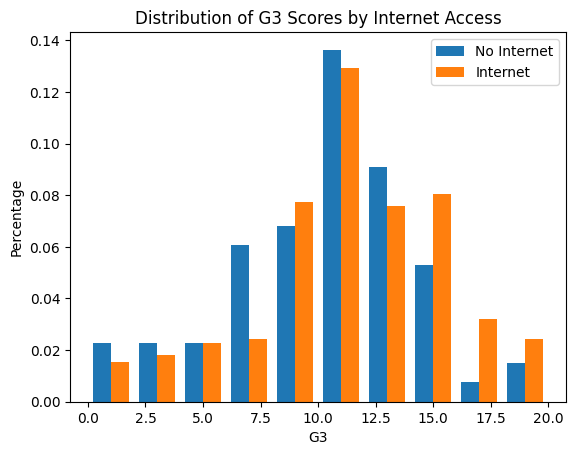

In [194]:
#G3 vs Internet access porcentaje
import matplotlib.pyplot as plt

no_internet_scores = df[df['internet'] == 'no']['G3']
internet_scores = df[df['internet'] == 'yes']['G3']

plt.hist([no_internet_scores, internet_scores], bins=10, label=['No Internet', 'Internet'], density=True)

plt.xlabel('G3')
plt.ylabel('Percentage')
plt.title('Distribution of G3 Scores by Internet Access')

plt.legend()

plt.show()

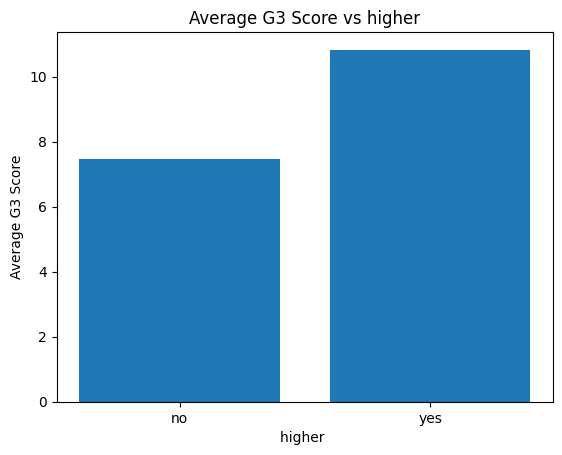

In [195]:
#Avg G3 vs higher
import matplotlib.pyplot as plt

average_scores = df.groupby('higher')['G3'].mean()

plt.bar(average_scores.index, average_scores)

plt.xticks(average_scores.index)

plt.xlabel('higher ')
plt.ylabel('Average G3 Score')
plt.title('Average G3 Score vs higher')

plt.show()

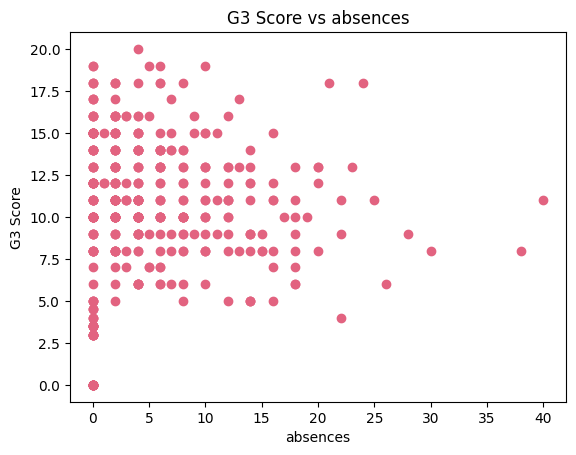

In [196]:
#G3 vs absences
import matplotlib.pyplot as plt

plt.scatter(df['absences'], df['G3'],color='#e26380')

plt.xlabel('absences')
plt.ylabel('G3 Score')
plt.title('G3 Score vs absences')

plt.show()

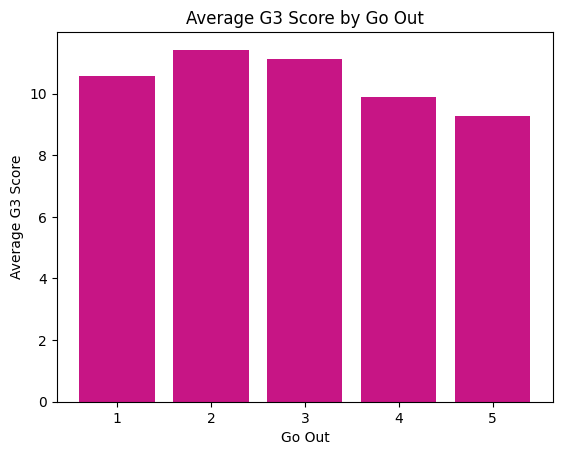

In [197]:
#G3 vs Go out
import matplotlib.pyplot as plt

average_scores = df.groupby('goout')['G3'].mean()

plt.bar(average_scores.index, average_scores, color='#C71585')

plt.xticks(average_scores.index)

plt.xlabel('Go Out')
plt.ylabel('Average G3 Score')
plt.title('Average G3 Score by Go Out')

plt.show()

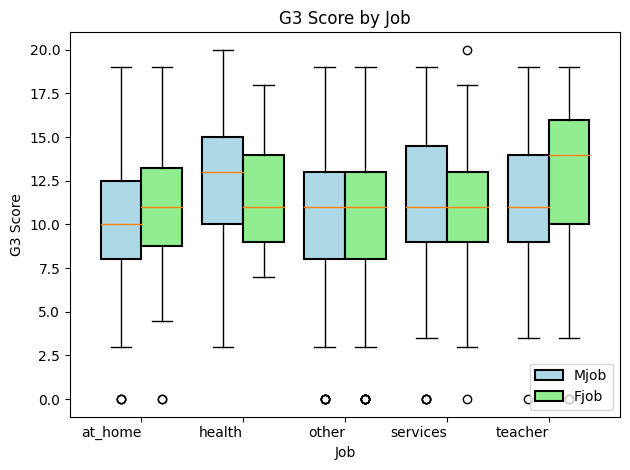

In [198]:
#G3 vs Jobs (M and F)
import matplotlib.pyplot as plt
import numpy as np

#Categorias de trabajos
mjob_categories = df['Mjob'].unique()
fjob_categories = df['Fjob'].unique()

#Combinar categorias
all_categories = np.unique(np.concatenate((mjob_categories, fjob_categories)))

#Cantidad
num_categories = len(all_categories)

fig, ax = plt.subplots()

positions = np.arange(1, num_categories + 1)

box_width = 0.4

#Boxplots
mjob_box = ax.boxplot([df[df['Mjob'] == job]['G3'] for job in all_categories], positions=positions - box_width/2, patch_artist=True, widths=box_width)
fjob_box = ax.boxplot([df[df['Fjob'] == job]['G3'] for job in all_categories], positions=positions + box_width/2, patch_artist=True, widths=box_width)

colors = ['lightblue', 'lightgreen']
for box in mjob_box['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor=colors[0])
for box in fjob_box['boxes']:
    box.set(color='black', linewidth=1.5)
    box.set(facecolor=colors[1])

ax.set_xticks(positions)
ax.set_xticklabels(all_categories, rotation=0, ha='right')

ax.set_xlabel('Job')
ax.set_ylabel('G3 Score')
ax.set_title('G3 Score by Job')

legend_boxes = [mjob_box['boxes'][0], fjob_box['boxes'][0]]
legend_labels = ['Mjob', 'Fjob']
ax.legend(legend_boxes, legend_labels)

plt.tight_layout()

plt.show()

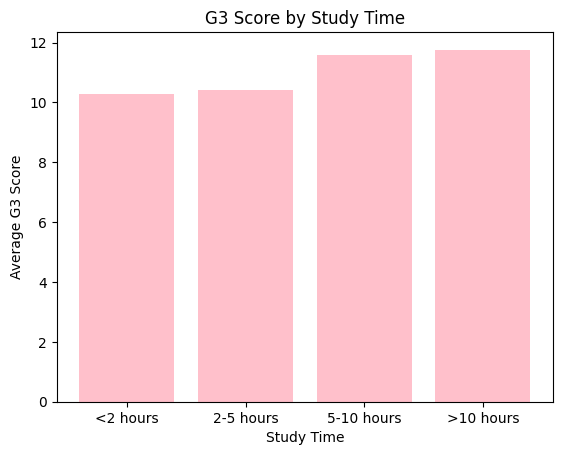

In [199]:
#G3 vs studytime
import matplotlib.pyplot as plt

average_g3 = df.groupby('studytime')['G3'].mean()

plt.bar(average_g3.index, average_g3, color='pink')
plt.xlabel('Study Time')
plt.ylabel('Average G3 Score')
plt.title('G3 Score by Study Time')
plt.xticks(average_g3.index, ['<2 hours', '2-5 hours', '5-10 hours', '>10 hours'])
plt.show()


Text(0.5, 0, ' weekend alcohol consumption')

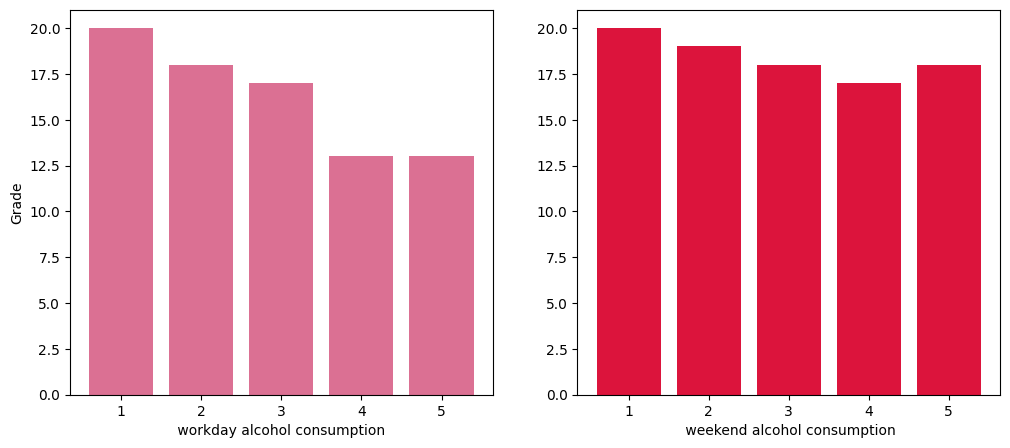

In [200]:
#G3 vs alcohol consumption Week and weekend
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
ax1.bar(df['Dalc'],df['G3'],color='palevioletred')
ax1.set_xlabel(' workday alcohol consumption ')
ax1.set_ylabel('Grade')
ax2.bar(df['Walc'],df['G3'],color='crimson')
ax2.set_xlabel(' weekend alcohol consumption')

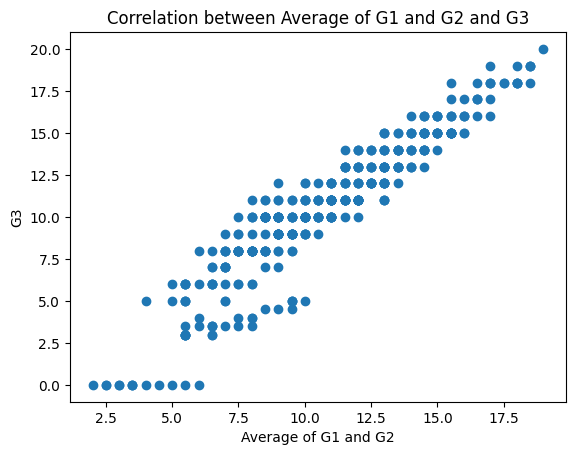

In [201]:
import matplotlib.pyplot as plt

#Promedio G1 y G2
average_grade = (df['G1'] + df['G2']) / 2

# Scatter plot
plt.scatter(average_grade, df['G3'])
plt.xlabel('Average of G1 and G2')
plt.ylabel('G3')
plt.title('Correlation between Average of G1 and G2 and G3')
plt.show()


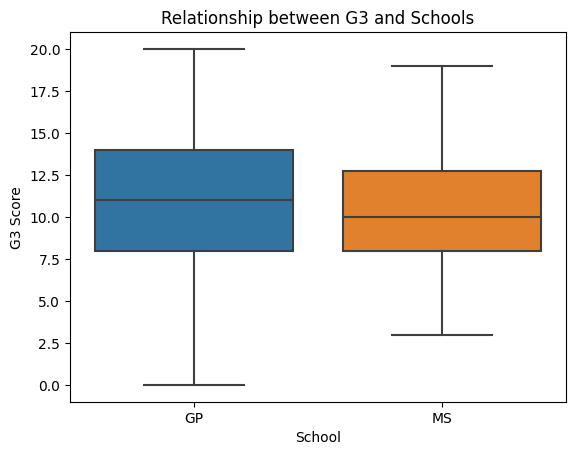

In [50]:
sns.boxplot(data=df, x='school', y='G3')
plt.xlabel('School')
plt.ylabel('G3 Score')
plt.title('Relationship between G3 and Schools')
plt.show()

##Modelo

###General

In [51]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [53]:
from sklearn.model_selection import train_test_split
X = df_num.drop(['G3'], axis=1)
y = df_num['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

###Prueba general

In [54]:
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Modelos
models = [
    CatBoostRegressor(),
    DecisionTreeRegressor(),
    XGBRegressor(),
    LinearRegression(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    SVR(),
    LGBMRegressor()
]

r2_scores = {}

#Iteración
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    model_name = type(model).__name__
    r2_scores[model_name] = r2

r2_scores


Learning rate set to 0.03413
0:	learn: 4.4328892	total: 55.6ms	remaining: 55.6s
1:	learn: 4.3438207	total: 58ms	remaining: 28.9s
2:	learn: 4.2545274	total: 61.2ms	remaining: 20.3s
3:	learn: 4.1878171	total: 67.2ms	remaining: 16.7s
4:	learn: 4.1128823	total: 68.9ms	remaining: 13.7s
5:	learn: 4.0549155	total: 75ms	remaining: 12.4s
6:	learn: 3.9900038	total: 83.7ms	remaining: 11.9s
7:	learn: 3.9237932	total: 93.8ms	remaining: 11.6s
8:	learn: 3.8573370	total: 101ms	remaining: 11.2s
9:	learn: 3.7917609	total: 122ms	remaining: 12.1s
10:	learn: 3.7159497	total: 123ms	remaining: 11.1s
11:	learn: 3.6520059	total: 124ms	remaining: 10.2s
12:	learn: 3.5825375	total: 130ms	remaining: 9.87s
13:	learn: 3.5300615	total: 131ms	remaining: 9.25s
14:	learn: 3.4728596	total: 132ms	remaining: 8.7s
15:	learn: 3.4112035	total: 134ms	remaining: 8.21s
16:	learn: 3.3649303	total: 135ms	remaining: 7.79s
17:	learn: 3.3001112	total: 136ms	remaining: 7.41s
18:	learn: 3.2540916	total: 137ms	remaining: 7.07s
19:	learn

{'CatBoostRegressor': 0.9033672687958797,
 'DecisionTreeRegressor': 0.9033492213908887,
 'XGBRegressor': 0.9180139782520271,
 'LinearRegression': 0.8340986412220874,
 'RandomForestRegressor': 0.915082793516541,
 'ExtraTreesRegressor': 0.8831831761028528,
 'SVR': 0.8187656493101614,
 'LGBMRegressor': 0.9213282980059316}

LinearRegression()

	R2 score: 0.8340986412220874

DecisionTreeRegressor()

	R2 score: 0.9033492213908887

ExtraTreesRegressor()

	R2 score: 0.8831831761028528

RandomForestRegressor()

	R2 score: 0.915082793516541

CatBoostRegressor()

	R2 score: 0.9033672687958797

LGBMRegressor()

	R2 score: 0.9213282980059316

XGBRegressor()

	R2 score: 0.9180139782520271

SVR()

	R2 score: 0.8187656493101614

###Random Forest Regressor

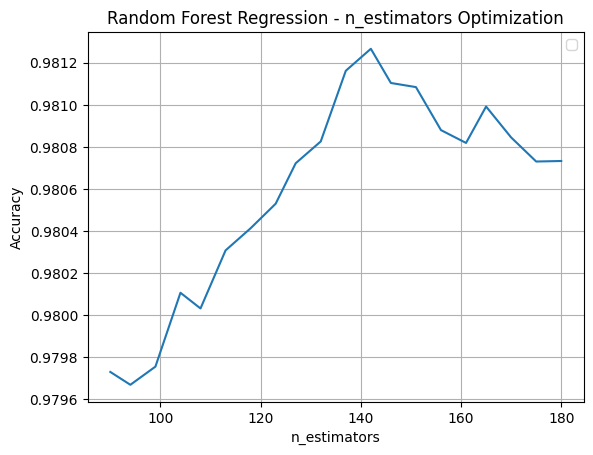

In [202]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

#Rango de n_estimators
n_estimators_range = np.linspace(start=90, stop=180, num=20, dtype=int)

accuracy = []

for n_estimators in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n_estimators, bootstrap=True, random_state=42)

    rf.fit(X_train, y_train)

    accuracy.append(rf.score(X_train, y_train))

# Plot
plt.plot(n_estimators_range, accuracy)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Regression - n_estimators Optimization')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#Hiperparametros

param_grid = {
    'max_depth': [5,10,20],
    'max_features' : [5,10,20],
    'n_estimators': [20,50,140,180,200]}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
param_grid=param_grid,cv=KFold(n_splits=5, shuffle=True, random_state=1))

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('Best R-squared:', r2)

print('Best hyperparameters:', best_params)

Best R-squared: 0.9199482543678688
Best hyperparameters: {'max_depth': 20, 'max_features': 20, 'n_estimators': 140}


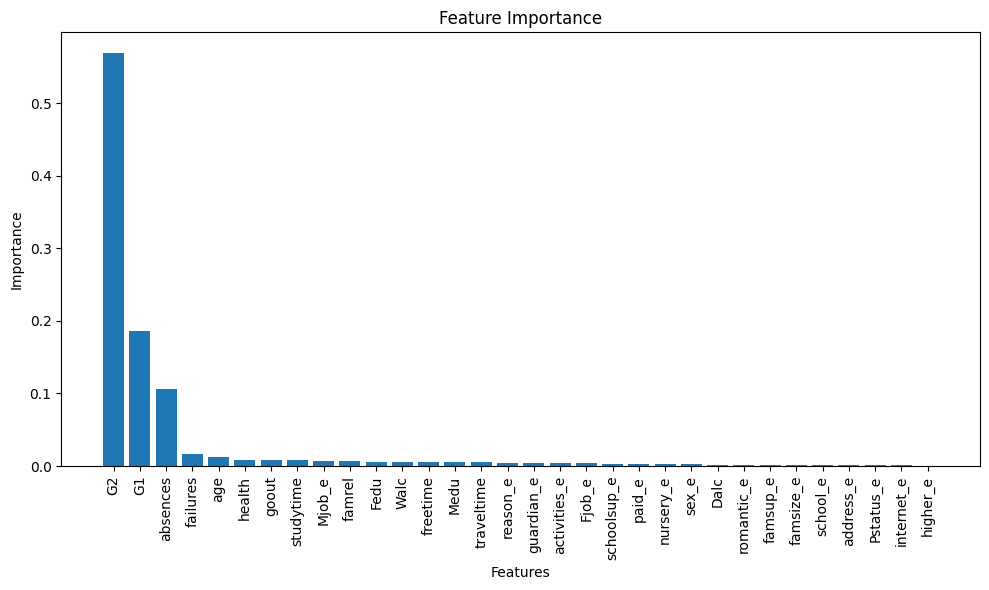

Best hyperparameters: {'max_depth': 20, 'max_features': 20, 'n_estimators': 140}


In [57]:
# Feature importances
feature_importances = best_model.feature_importances_

indices = np.argsort(feature_importances)[::-1]

feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print('Best hyperparameters:', best_params)

###XGB

Best n_estimators: 104


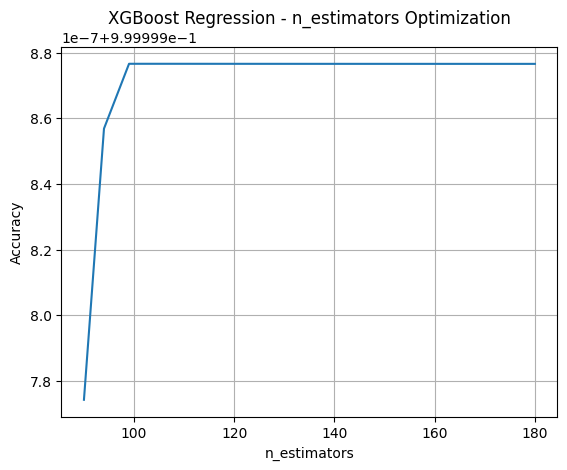

In [203]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

n_estimators_range = np.linspace(start=90, stop=180, num=20, dtype=int)

accuracy = []

for n_estimators in n_estimators_range:
    xgb_model = xgb.XGBRegressor(n_estimators=n_estimators, random_state=42)

    xgb_model.fit(X_train, y_train)

    accuracy.append(xgb_model.score(X_train, y_train))

accuracy = np.array(accuracy)

max_index = np.argmax(accuracy)

max_accuracy = accuracy[max_index]
best_n_estimators = n_estimators_range[max_index]
print("Best n_estimators:", best_n_estimators)

plt.plot(n_estimators_range, accuracy)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Regression - n_estimators Optimization')
plt.grid(True)
plt.show()


In [62]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

#Hiperparametros

params = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 1,
    'min_child_weight': 1,
    'n_estimators': 104
}

model = xgb.XGBRegressor(**params)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.933603272486785


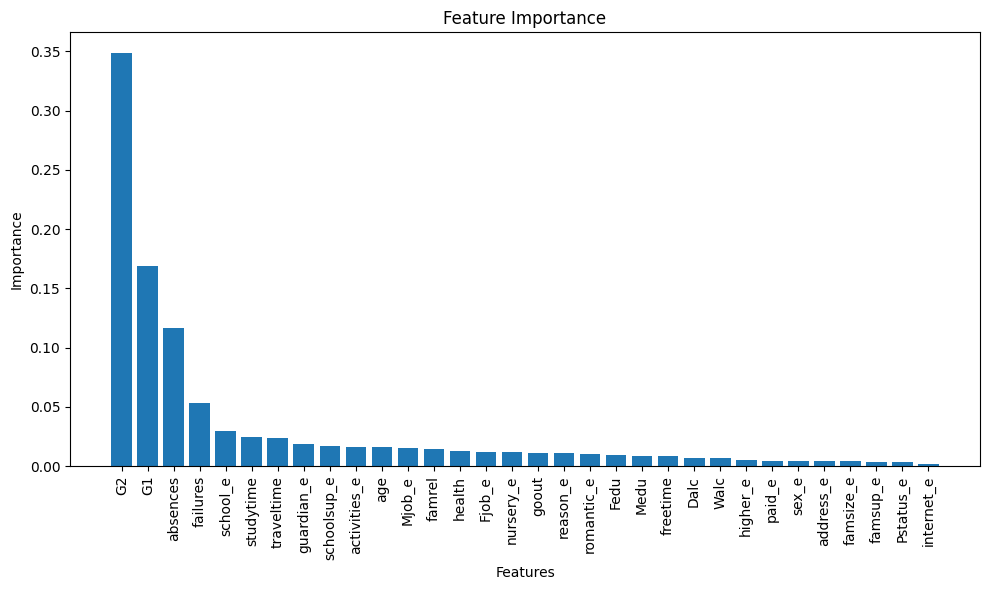

In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Feature importances
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Gridsearch

In [100]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Hiperparametros

params = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.1, 0.5, 1.0],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [100, 104, 200, 300]
}


model = xgb.XGBRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('Best R-squared:', r2)

print('Best hyperparameters:', best_params)

KeyboardInterrupt: ignored

###Catboost

In [113]:
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt

n_estimators_range = np.linspace(start=90, stop=180, num=20, dtype=int)

accuracy = []

for n_estimators in n_estimators_range:
    catboost_model = CatBoostRegressor(n_estimators=n_estimators, random_state=42)

    catboost_model.fit(X_train, y_train)

    accuracy.append(catboost_model.score(X_train, y_train))

accuracy = np.array(accuracy)

max_index = np.argmax(accuracy)

max_accuracy = accuracy[max_index]
best_n_estimators = n_estimators_range[max_index]

print("Maximum Accuracy:", max_accuracy)
print("Best n_estimators:", best_n_estimators)


Learning rate set to 0.24173
0:	learn: 3.8569071	total: 1.31ms	remaining: 117ms
1:	learn: 3.3192161	total: 2.48ms	remaining: 109ms
2:	learn: 2.9392209	total: 3.21ms	remaining: 93.2ms
3:	learn: 2.6619707	total: 4.27ms	remaining: 91.9ms
4:	learn: 2.4239500	total: 5.55ms	remaining: 94.4ms
5:	learn: 2.1933637	total: 6.84ms	remaining: 95.8ms
6:	learn: 1.9961386	total: 8.11ms	remaining: 96.2ms
7:	learn: 1.8842673	total: 9.45ms	remaining: 96.8ms
8:	learn: 1.7989402	total: 10.7ms	remaining: 96.1ms
9:	learn: 1.7214996	total: 12.6ms	remaining: 101ms
10:	learn: 1.6359313	total: 13.9ms	remaining: 99.7ms
11:	learn: 1.5519531	total: 15.2ms	remaining: 98.7ms
12:	learn: 1.4790383	total: 16.5ms	remaining: 97.5ms
13:	learn: 1.4216410	total: 17.8ms	remaining: 96.5ms
14:	learn: 1.3897851	total: 19.1ms	remaining: 95.7ms
15:	learn: 1.3454481	total: 20.5ms	remaining: 94.8ms
16:	learn: 1.3133062	total: 21.8ms	remaining: 93.5ms
17:	learn: 1.2728792	total: 23.1ms	remaining: 92.3ms
18:	learn: 1.2519072	total: 24

In [58]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

#Hiperparametros

param_grid = {
    'depth': [5, 10, 20],
    'learning_rate': [0.1, 0.3],
    'iterations': [20, 50,100,180],
    'l2_leaf_reg': [1, 3, 5],
    'random_strength': [0.1, 0.5, 1]
}

model = CatBoostRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('Best R-squared:', r2)

print('Best hyperparameters:', best_params)


Se han truncado las últimas 5000 líneas del flujo de salida.
62:	learn: 0.7308369	total: 712ms	remaining: 1.32s
63:	learn: 0.7159617	total: 722ms	remaining: 1.31s
64:	learn: 0.6996174	total: 735ms	remaining: 1.3s
65:	learn: 0.6885360	total: 749ms	remaining: 1.29s
66:	learn: 0.6729065	total: 759ms	remaining: 1.28s
67:	learn: 0.6620663	total: 769ms	remaining: 1.27s
68:	learn: 0.6500096	total: 779ms	remaining: 1.25s
69:	learn: 0.6373534	total: 789ms	remaining: 1.24s
70:	learn: 0.6256215	total: 799ms	remaining: 1.23s
71:	learn: 0.6128215	total: 809ms	remaining: 1.21s
72:	learn: 0.6017370	total: 822ms	remaining: 1.2s
73:	learn: 0.5913735	total: 835ms	remaining: 1.2s
74:	learn: 0.5797759	total: 845ms	remaining: 1.18s
75:	learn: 0.5663510	total: 855ms	remaining: 1.17s
76:	learn: 0.5537824	total: 866ms	remaining: 1.16s
77:	learn: 0.5421347	total: 876ms	remaining: 1.15s
78:	learn: 0.5321750	total: 886ms	remaining: 1.13s
79:	learn: 0.5222125	total: 896ms	remaining: 1.12s
80:	learn: 0.5106164	tot

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5734, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2341, in _fit
    train_

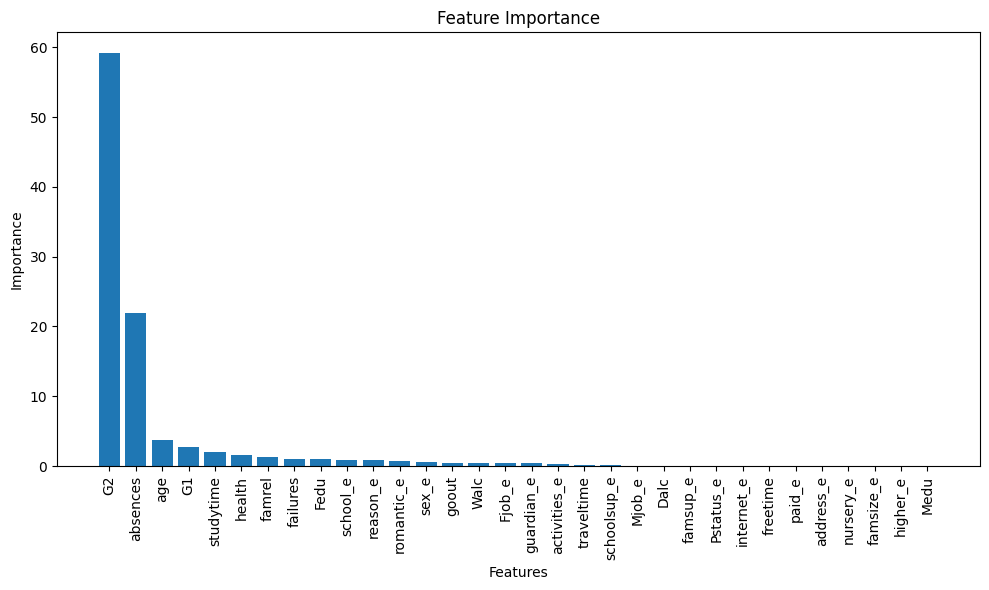

Best hyperparameters: {'depth': 5, 'iterations': 20, 'l2_leaf_reg': 1, 'learning_rate': 0.3, 'random_strength': 0.1}


In [59]:
# Feature importances
feature_importances = best_model.feature_importances_

indices = np.argsort(feature_importances)[::-1]

feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print('Best hyperparameters:', best_params)

###Extra trees

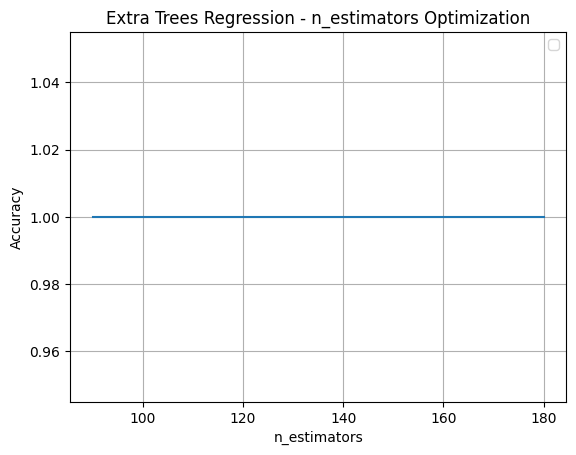

Best n_estimators: 90


In [64]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import matplotlib.pyplot as plt

n_estimators_range = np.linspace(start=90, stop=180, num=20, dtype=int)

accuracy = []

for n_estimators in n_estimators_range:
    et = ExtraTreesRegressor(n_estimators=n_estimators, random_state=42)

    et.fit(X_train, y_train)

    accuracy.append(et.score(X_train, y_train))

plt.plot(n_estimators_range, accuracy)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Extra Trees Regression - n_estimators Optimization')
plt.legend()
plt.grid(True)
plt.show()

best_index = np.argmax(accuracy)

best_n_estimators = n_estimators_range[best_index]

print("Best n_estimators:", best_n_estimators)


In [63]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor

#Hiperparametros

param_grid = {
    'n_estimators': [50, 100, 90, 200]
}

model = ExtraTreesRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('Best R-squared:', r2)

print('Best hyperparameters:', best_params)


Best R-squared: 0.8831300880089954
Best hyperparameters: {'n_estimators': 200}


###LGBM

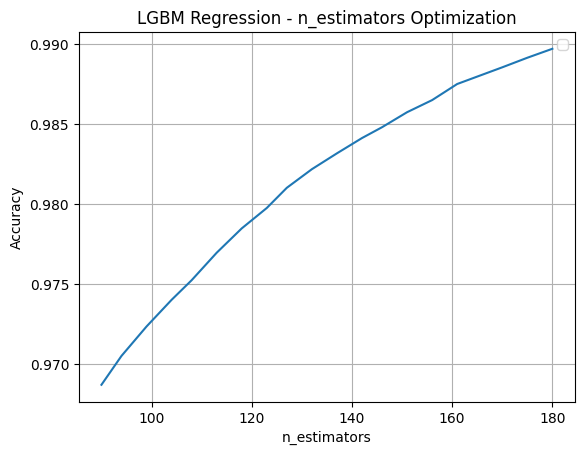

Best n_estimators: 104


In [204]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

n_estimators_range = np.linspace(start=90, stop=180, num=20, dtype=int)

accuracy = []

for n_estimators in n_estimators_range:
    lgb_model = lgb.LGBMRegressor(n_estimators=n_estimators, random_state=42)

    lgb_model.fit(X_train, y_train)

    accuracy.append(lgb_model.score(X_train, y_train))

plt.plot(n_estimators_range, accuracy)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('LGBM Regression - n_estimators Optimization')
plt.legend()
plt.grid(True)
plt.show()
print("Best n_estimators:", best_n_estimators)



In [60]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
import lightgbm as lgb

#Hiperparametros

param_grid = {
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [20,50, 100,180,200],
    'max_depth': [5, 10, 20],
    'min_child_samples': [1, 5, 10]
}

model = lgb.LGBMRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('Best R-squared:', r2)

print('Best hyperparameters:', best_params)


Best R-squared: 0.9293926547342954
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 1, 'n_estimators': 50, 'num_leaves': 10}


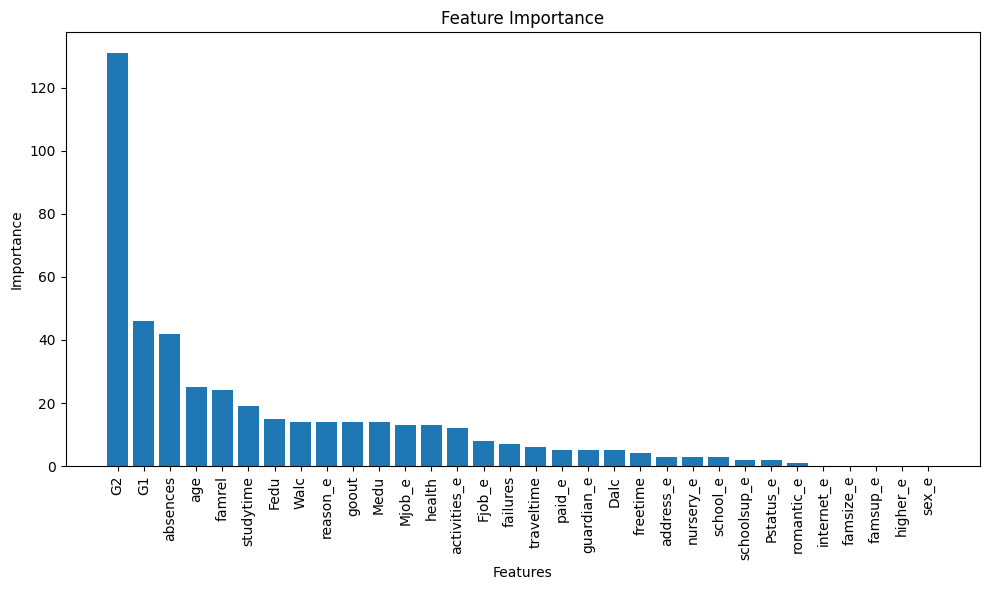

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 1, 'n_estimators': 50, 'num_leaves': 10}


In [61]:
# Feature importances
feature_importances = best_model.feature_importances_

indices = np.argsort(feature_importances)[::-1]

feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print('Best hyperparameters:', best_params)

###SVR

In [124]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression


#Hiperparametros

param_grid = {
    'C': [0.1, 1, 2],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'rbf', 'poly']
}

svr = SVR()

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print('Best Hyperparameters:', best_params)
print('R-squared Score:', r2)


Best Hyperparameters: {'C': 2, 'epsilon': 0.3, 'kernel': 'rbf'}
R-squared Score: 0.84706943195291


###Linear regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

#Hiperparametros
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

model = LinearRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print('Best Hyperparameters:', best_params)
print('R-squared Score:', r2)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': False}
R-squared Score: 0.8341696149273309


###Decision tree

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.8983211462031314


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

#Hiperparametros

param_grid = {
    'max_depth': [1,3, 5, 10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,5],
    'min_weight_fraction_leaf': [0.01, 0.1, 0.2],
    'max_leaf_nodes': [None, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print('Best Hyperparameters:', best_params)
print('R-squared Score:', r2)


Best Hyperparameters: {'max_depth': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.01}
R-squared Score: 0.8806792172665695
